# Submission

Nama: Jafar Umar Assadulloh

**Proyek Akhir : Image Classification Model Deployment**

Berikut kriteria submission yang harus Anda penuhi:



1.   Dataset yang akan dipakai bebas, namun minimal memiliki 1000 buah gambar.
2.   Dataset tidak pernah digunakan pada submission kelas machine learning sebelumnya.

3.   Dataset dibagi menjadi 80% train set dan 20% test set.

4.   Model harus menggunakan model sequential.
5.   Model harus menggunakan Conv2D Maxpooling Layer.


6.   Akurasi pada training dan validation set minimal sebesar 80%.

7.   Menggunakan Callback.
8.   Membuat plot terhadap akurasi dan loss model.

9.   Menulis kode untuk menyimpan model ke dalam format TF-Lite.

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
#import tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Activation, Flatten, MaxPool2D

#Print tensorflow version
print(tf.__version__)

2.12.0


In [34]:
#Install split folders
!pip install split_folders

In [35]:
#Memisahkan data latih dan validasi
import zipfile,os
import splitfolders

local_zip = '/content/drive/MyDrive/Dicoding/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('data')
zip_ref.close()

splitfolders.ratio('data/rockpaperscissors/rps-cv-images', output="data/rockpaperscissors/data", seed=1337, ratio=(.8, .2))


data_dir = 'data/rockpaperscissors/data'
train_dir = os.path.join(data_dir, 'train')
validation_dir = os.path.join(data_dir, 'val')

os.listdir('data/rockpaperscissors/data/train')
os.listdir('data/rockpaperscissors/data/val')

Copying files: 2188 files [00:00, 2990.52 files/s]


['scissors', 'rock', 'paper']

In [36]:
print(len(os.listdir('data/rockpaperscissors/paper')))
print(len(os.listdir('data/rockpaperscissors/scissors')))
print(len(os.listdir('data/rockpaperscissors/rock')))

712
750
726


In [37]:
train_paper_dir = os.path.join(train_dir, 'paper')
train_scissors_dir = os.path.join(train_dir, 'scissors')
train_rock_dir = os.path.join(train_dir, 'rock')

validation_paper_dir = os.path.join(validation_dir, 'paper')
validation_scissors_dir = os.path.join(validation_dir, 'scissors')
validation_rock_dir = os.path.join(validation_dir, 'rock')

In [38]:
paper_imgs = os.listdir(train_paper_dir)
scissors_imgs = os.listdir(train_scissors_dir)
rock_imgs = os.listdir(train_rock_dir)

In [39]:
train_generator.class_indices
valid_generator.class_indices

{'paper': 0, 'rock': 1, 'scissors': 2}

In [40]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 98, 98, 16)        448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 49, 49, 16)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 49, 49, 16)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 47, 47, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 23, 23, 32)       

In [41]:
#Kompilasi model dan alur pelatihan
model.compile(loss = 'categorical_crossentropy',
              optimizer= 'RMSprop',
              metrics= ['accuracy'])

In [42]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.92 and logs.get('val_accuracy')>0.92):
      print("\nAccuracy above 92%, finish training!")
      self.model.stop_training = True

callbacks = myCallback()

In [43]:
history = model.fit(train_generator,
          steps_per_epoch=25,
          epochs=20,
          validation_data=valid_generator,
          validation_steps=5,
          verbose=2,
          callbacks=[callbacks])

Epoch 1/20
25/25 - 19s - loss: 1.1553 - accuracy: 0.3675 - val_loss: 1.0867 - val_accuracy: 0.4938 - 19s/epoch - 778ms/step
Epoch 2/20
25/25 - 25s - loss: 1.0277 - accuracy: 0.4829 - val_loss: 0.9096 - val_accuracy: 0.7437 - 25s/epoch - 1s/step
Epoch 3/20
25/25 - 20s - loss: 0.6467 - accuracy: 0.7440 - val_loss: 0.7743 - val_accuracy: 0.5875 - 20s/epoch - 802ms/step
Epoch 4/20
25/25 - 14s - loss: 0.4973 - accuracy: 0.8175 - val_loss: 0.3674 - val_accuracy: 0.9312 - 14s/epoch - 579ms/step
Epoch 5/20
25/25 - 12s - loss: 0.3340 - accuracy: 0.8783 - val_loss: 0.2830 - val_accuracy: 0.8875 - 12s/epoch - 486ms/step
Epoch 6/20
25/25 - 14s - loss: 0.2936 - accuracy: 0.8783 - val_loss: 0.2570 - val_accuracy: 0.9250 - 14s/epoch - 542ms/step
Epoch 7/20
25/25 - 14s - loss: 0.2578 - accuracy: 0.9013 - val_loss: 0.2390 - val_accuracy: 0.9750 - 14s/epoch - 548ms/step
Epoch 8/20

Accuracy above 92%, finish training!
25/25 - 13s - loss: 0.1922 - accuracy: 0.9366 - val_loss: 0.2092 - val_accuracy: 0.937

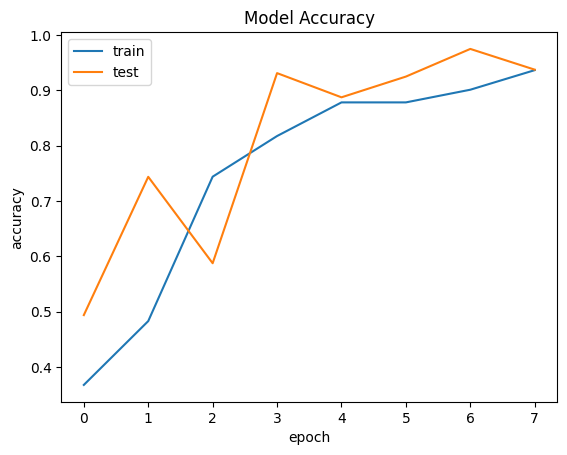

In [44]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

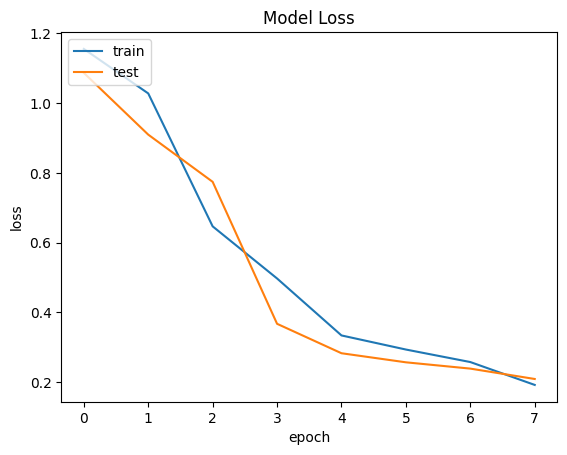

In [45]:
# plot of loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [46]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [47]:
!ls -la | grep 'model'

-rw-r--r-- 1 root root 4597144 Aug 30 07:07 model.tflite
